In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/frodos/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data = pd.read_csv('monthly-milk-production.csv',sep=';',index_col=['month'], parse_dates=['month'], dayfirst=True);
data.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


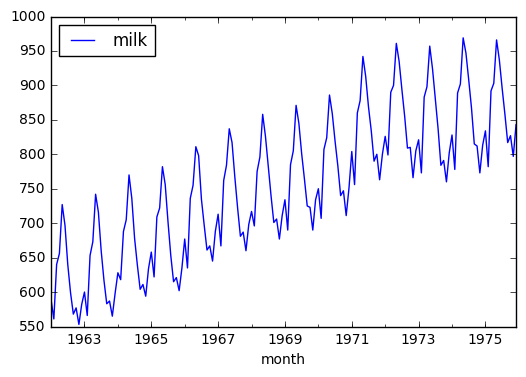

In [3]:
data.plot()

In [4]:
import statsmodels.api as sm

adf, pvalue, usedlag, nobs, critical_values, icbest = sm.tsa.stattools.adfuller(data.milk)

In [5]:
pvalue

0.62742670860303207

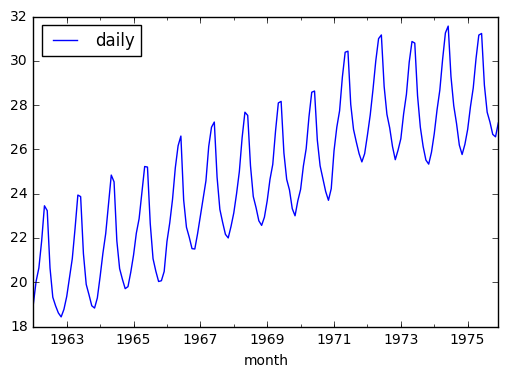

In [7]:
data = data.assign(daily = data.milk*1.0/data.index.days_in_month);
data.plot(y = 'daily')

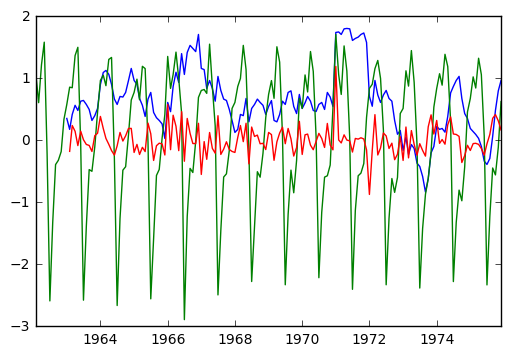

In [26]:
diff1 = data.daily - data.daily.shift(12);
diff2 = data.daily - data.daily.shift(1);
diff3 = diff1-diff1.shift(1)

plt.plot(diff1)
plt.plot(diff2)
plt.plot(diff3)

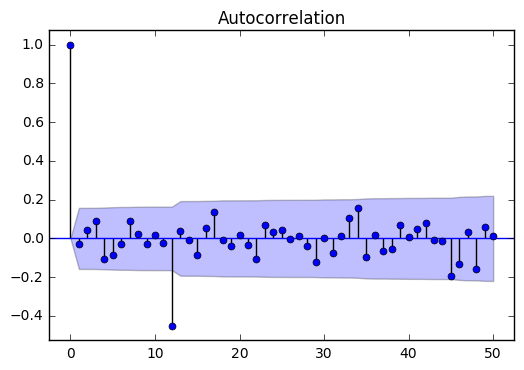

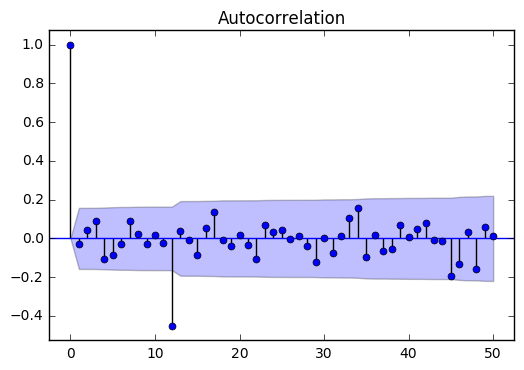

In [35]:
sm.graphics.tsa.plot_acf(diff3.values[13:].squeeze(), lags=50)

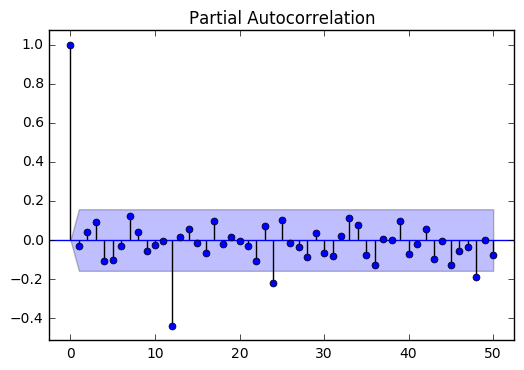

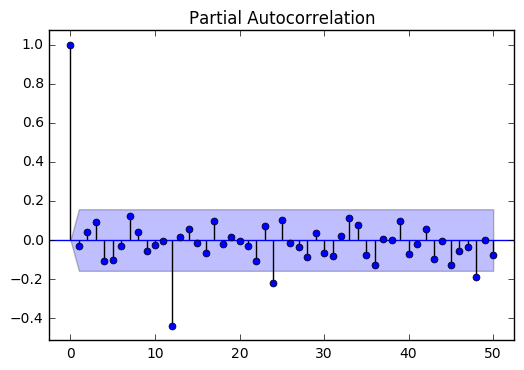

In [36]:
sm.graphics.tsa.plot_pacf(diff3.values[13:].squeeze(), lags=50)